# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Javascript
from datetime import datetime
from pandas.api.types import is_numeric_dtype
import os
import time
import getpass
import statistics
import math

# Reading the data

In [2]:
# TO FETCH THE LATEST DATASET AND UP-TO-DATE FIGURES, RUN THE BELOW COMMANDS
"""
#raw_data_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
#df = pd.read_csv(raw_data_url, error_bad_lines=False)
"""

# TO READ DOWNLOADED DATASET 
raw_df = pd.read_csv(r'owid-covid-data.csv')

In [3]:
raw_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92585,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92586,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92587,ZWE,Africa,Zimbabwe,2021-05-29,38933.0,15.0,36.286,1594.0,2.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92588,ZWE,Africa,Zimbabwe,2021-05-30,38944.0,11.0,37.429,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


# Analyzing information about the dataset

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92590 entries, 0 to 92589
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92590 non-null  object 
 1   continent                              88200 non-null  object 
 2   location                               92590 non-null  object 
 3   date                                   92590 non-null  object 
 4   total_cases                            89750 non-null  float64
 5   new_cases                              89749 non-null  float64
 6   new_cases_smoothed                     88737 non-null  float64
 7   total_deaths                           79835 non-null  float64
 8   new_deaths                             79993 non-null  float64
 9   new_deaths_smoothed                    88737 non-null  float64
 10  total_cases_per_million                89270 non-null  float64
 11  ne

#### Description of numerical data values present in the dataset

In [5]:
raw_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.975000e+04,8.974900e+04,88737.000000,7.983500e+04,79993.000000,88737.000000,89270.000000,89269.000000,88262.000000,79368.000000,...,83315.000000,56353.000000,83495.000000,85415.000000,65359.000000,64400.000000,41953.000000,76123.000000,87920.000000,83673.000000
mean,9.428784e+05,6.065578e+03,6078.273726,2.536382e+04,142.207343,127.176786,11571.659247,76.083727,76.290975,252.106321,...,19294.525068,13.382322,258.143058,7.884258,10.540618,32.673933,50.872085,3.028665,73.233802,0.727702
std,6.507005e+06,3.861909e+04,37876.920441,1.512185e+05,781.226472,721.581180,21783.995192,201.058617,158.088957,439.871653,...,19963.713519,19.954802,118.894954,4.074100,10.429258,13.477401,31.761251,2.460948,7.562331,0.150397
min,1.000000e+00,-3.486670e+05,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-5160.525000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.089000e+03,2.000000e+00,7.143000,4.900000e+01,0.000000,0.000000,227.224250,0.207000,1.231000,7.478000,...,4466.507000,0.600000,167.295000,5.310000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.200250e+04,7.100000e+01,88.714000,3.390000e+02,2.000000,1.286000,1555.757500,7.968000,10.551000,45.630500,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000
75%,1.270760e+05,7.880000e+02,827.857000,3.310000e+03,18.000000,14.143000,11572.720500,70.558000,79.279250,277.428250,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000
max,1.707274e+08,1.498213e+06,826374.286000,3.550000e+06,17906.000000,14436.286000,177661.296000,18293.675000,4083.500000,3077.839000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


#### Identifying the number of unique values present in each column (attribute)

In [6]:
raw_df.nunique()

iso_code                                   230
continent                                    6
location                                   230
date                                       517
total_cases                              49061
new_cases                                12285
new_cases_smoothed                       23605
total_deaths                             18699
new_deaths                                2883
new_deaths_smoothed                       6499
total_cases_per_million                  69617
new_cases_per_million                    39390
new_cases_smoothed_per_million           44471
total_deaths_per_million                 43364
new_deaths_per_million                    7399
new_deaths_smoothed_per_million           8786
reproduction_rate                          368
icu_patients                              2497
icu_patients_per_million                  5301
hosp_patients                             4885
hosp_patients_per_million                 8796
weekly_icu_ad

#### Identifying number of NULL values in each column

In [7]:
raw_df.isnull().sum()

iso_code                                     0
continent                                 4390
location                                     0
date                                         0
total_cases                               2840
new_cases                                 2841
new_cases_smoothed                        3853
total_deaths                             12755
new_deaths                               12597
new_deaths_smoothed                       3853
total_cases_per_million                   3320
new_cases_per_million                     3321
new_cases_smoothed_per_million            4328
total_deaths_per_million                 13222
new_deaths_per_million                   13064
new_deaths_smoothed_per_million           4328
reproduction_rate                        18119
icu_patients                             83261
icu_patients_per_million                 83261
hosp_patients                            80994
hosp_patients_per_million                80994
weekly_icu_ad

#### Raw data parameters

In [8]:
raw_df_dimensions = raw_df.shape
raw_locations = raw_df.location.unique()
raw_df['date'] = pd.to_datetime(raw_df['date'])
raw_df_dates = raw_df['date'].to_list()
raw_df_latest_date = raw_df['date'].to_list()[-1].strftime('%b %d, %Y')

# Pre-process raw dataset

In [9]:
min_population = 1000000
OWID_preProcessed_data_df = ''

preProcessed_df = raw_df.copy()

# CONVERT 'date' COLUMN TO DATETIME DATA TYPE
preProcessed_df['date'] = pd.to_datetime(preProcessed_df['date'])

# REMOVE SMALL LOCATIONS
preProcessed_df = preProcessed_df[preProcessed_df.population >= min_population]

# SET 'location' AS ROW INDEX
preProcessed_df.set_index('location', inplace=True)

#RE-SCALE 'total_vaccinations_per_hundred' AND 'people_fully_vaccinated_per_hundred' TO PER MILLION
preProcessed_df['total_vaccinations_per_hundred'] *= 10000
preProcessed_df['people_fully_vaccinated_per_hundred'] *= 10000
preProcessed_df.rename(columns = {"total_vaccinations_per_hundred":"total_vaccinations_per_million",
                                            "people_fully_vaccinated_per_hundred":"people_fully_vaccinated_per_million"}, inplace=True)

In [10]:
preProcessed_df

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
Afghanistan,AFG,Asia,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,Africa,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-05-29,38933.0,15.0,36.286,1594.0,2.0,1.143,2619.471,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


# Continents in terms of occurence of COVID-19 cases

In [11]:
raw_df.continent.value_counts()

Africa           23955
Asia             22082
Europe           21992
North America    11325
South America     5607
Oceania           3239
Name: continent, dtype: int64

# Visualization

In [12]:
# CREATING DATASETS TO BE USED
perCapita_daily_columns = ["date","new_cases_smoothed_per_million", "new_deaths_smoothed_per_million",
                           "new_vaccinations_smoothed_per_million"]

perCapita_cumulative_columns = ["date", "total_cases_per_million", "total_deaths_per_million",
                                "total_vaccinations_per_million", "people_fully_vaccinated_per_million"]

# CREATING NEW DATAFRAMES
perCapita_daily_df = preProcessed_df[perCapita_daily_columns]
perCapita_cumulative_df = preProcessed_df[perCapita_cumulative_columns]

In [13]:
perCapita_cumulative_df

,date,total_cases_per_million,total_deaths_per_million,total_vaccinations_per_million,people_fully_vaccinated_per_million
location,,,,,
Afghanistan,2020-02-24,0.026,NaN,NaN,NaN
Afghanistan,2020-02-25,0.026,NaN,NaN,NaN
Afghanistan,2020-02-26,0.026,NaN,NaN,NaN
Afghanistan,2020-02-27,0.026,NaN,NaN,NaN
Afghanistan,2020-02-28,0.026,NaN,NaN,NaN
...,...,...,...,...,...
Zimbabwe,2021-05-27,2614.155,107.112,64100.0,20500.0
Zimbabwe,2021-05-28,2618.461,107.112,65700.0,21500.0
Zimbabwe,2021-05-29,2619.471,107.247,67400.0,22600.0


In [14]:
# ASKING USER WHETHER TO SAVE THE PLOT ON THE DISK OR NOT 

if (input("The latest date in the dataset is %s. Save/download plots? y/n: " 
          % raw_df_latest_date).lower()[0] == 'y'):
  save_files = True
  print("\nPlots will be saved/downloaded.")
else:
  save_files = False
  print("Plots will not be saved/downloaded.")

The latest date in the dataset is May 31, 2021. Save/download plots? y/n: y

Plots will be saved/downloaded.


# PER CAPITA DAILY DATA

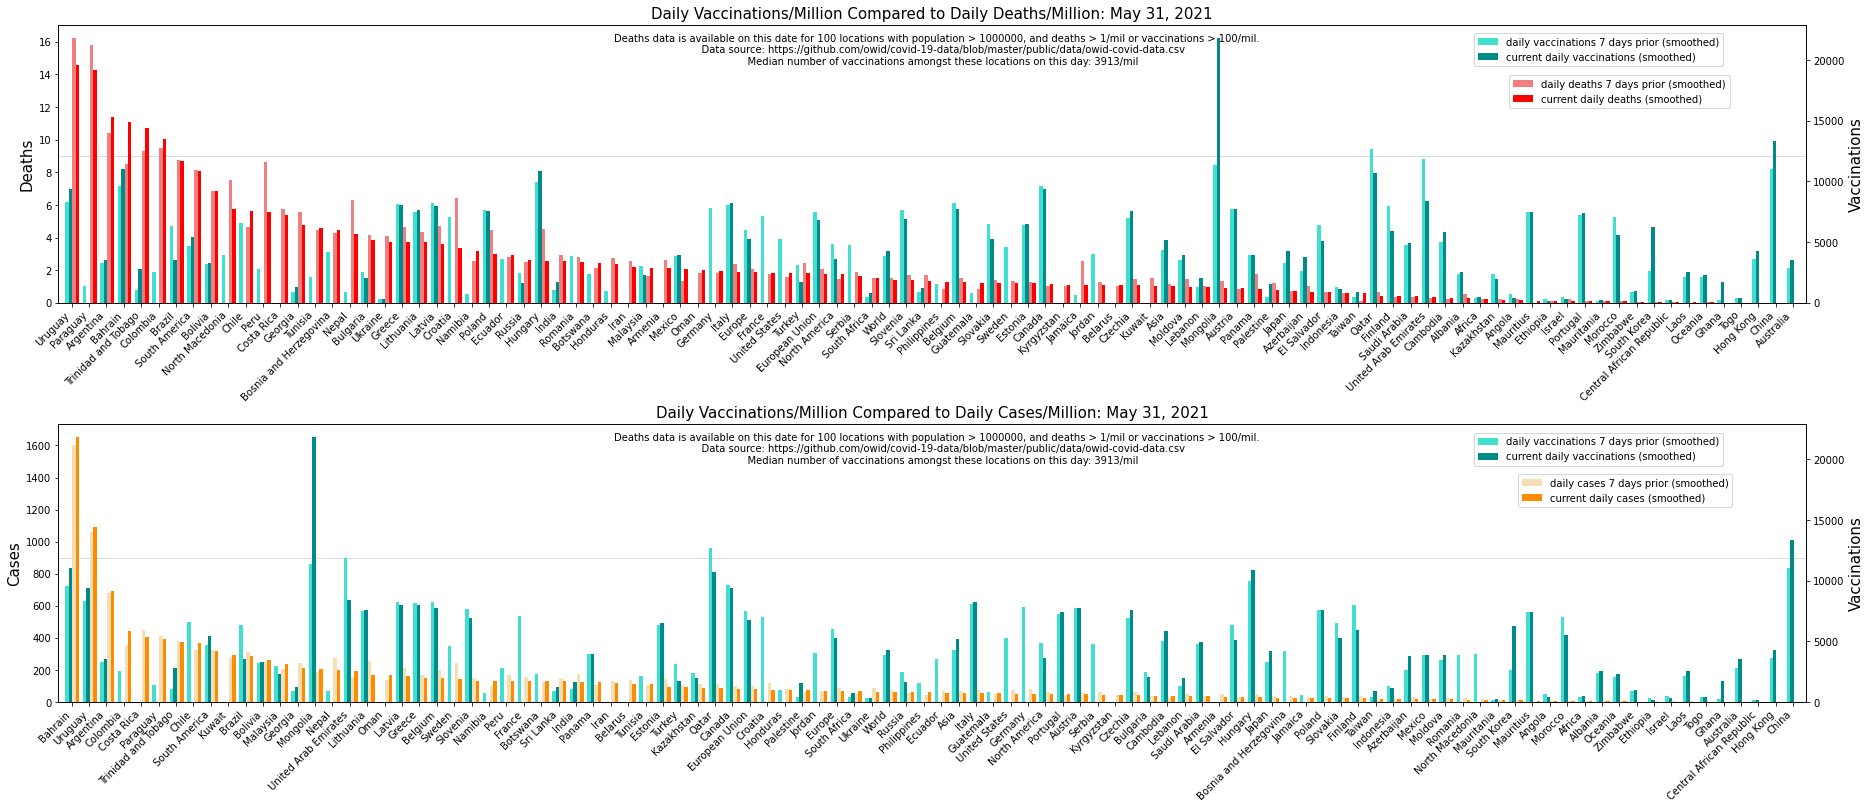

In [15]:
num_days_back = 7
legend_labels = []
x_vals = []
bar_width = 0.2
bar_transparency = 1
date_offset = 0
current_date = raw_df_dates[-1+date_offset]
past_date = raw_df_dates[-1*(num_days_back-date_offset)]
daily_deaths_threshold = 1 # include locations with more than this per million
daily_vax_threshold = 100

# Remove locations below daily deaths and vaccinations thresholds
perCapita_daily_filtered_df = perCapita_daily_df.query('new_deaths_smoothed_per_million > %d or new_vaccinations_smoothed_per_million > %d' %
                                                                 (daily_deaths_threshold, daily_vax_threshold))
# Temp datasets: extract current and past date rows for each location
temp_current_df = perCapita_daily_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == current_date])
temp_past_df = perCapita_daily_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == past_date])

# median daily vaccinations
median_daily_vaxs = temp_current_df['new_vaccinations_smoothed_per_million'].median().astype("int32")

# CREATE PLOTS
x_vals = np.arange(len(temp_current_df.index))
fig, axs = plt.subplots(2, 1, figsize=[int(len(x_vals)/4),10])
fig.tight_layout(h_pad=10)
inclusion_string = "Deaths data is available on this date for %d locations with population > %d, and deaths > %d/mil or vaccinations > %d/mil.\n\
    Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n\
    Median number of vaccinations amongst these locations on this day: %d/mil" \
     % (len([i[0] for i in temp_current_df.index]), min_population, daily_deaths_threshold, daily_vax_threshold, median_daily_vaxs)

# death/vaccinations (top)
# sort temp datasets by "new_deaths_smoothed_per_million"
temp_current_df = temp_current_df.sort_values("new_deaths_smoothed_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_top1 = axs[0]
ax_top2 = ax_top1.twinx()
ax_top1.set_xlim([-0.5,len(x_vals)])
ax_top2.set_xlim([-0.5,len(x_vals)])
ax_top2.set_ylabel('Vaccinations', fontsize=15)
ax_top1.set_ylabel('Deaths', fontsize=15)
ax_top2.set_title("Daily Vaccinations/Million Compared to Daily Deaths/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_top1.set_xticks(x_vals + bar_width*1.3)
ax_top1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_top1.bar(x_vals + bar_width*2, temp_past_df["new_deaths_smoothed_per_million"], alpha=bar_transparency, color='lightcoral', width=bar_width, zorder=1)
ax_top1.bar(x_vals + bar_width*3, temp_current_df["new_deaths_smoothed_per_million"], alpha=bar_transparency, color='red', width=bar_width, zorder=1)
ax_top1.hlines(ax_top1.get_yticks()[-1]/2, ax_top1.get_xlim()[0], ax_top1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_top2.bar(x_vals, temp_past_df["new_vaccinations_smoothed_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_top2.bar(x_vals + bar_width, temp_current_df["new_vaccinations_smoothed_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_top2.legend(['daily vaccinations %d days prior (smoothed)'%num_days_back, 'current daily vaccinations (smoothed)'], loc=[0.81,0.85])
ax_top1.legend(['daily deaths %d days prior (smoothed)'%num_days_back, 'current daily deaths (smoothed)'], loc=[0.83, 0.7])
ax_top2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, va='top', ha='center', fontsize=10)

# cases/vaccinations (bottom)
# sort temp datasets by "new_cases_smoothed_per_million"
temp_current_df = temp_current_df.sort_values("new_cases_smoothed_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_bottom1 = axs[1]
ax_bottom2 = ax_bottom1.twinx()
ax_bottom2.set_ylabel('Vaccinations', fontsize=15)
ax_bottom1.set_ylabel('Cases', fontsize=15)
ax_bottom2.set_title("Daily Vaccinations/Million Compared to Daily Cases/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_bottom1.set_xticks(x_vals + bar_width*1.3)
ax_bottom1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_bottom1.set_xlim([-0.5,len(x_vals)])
ax_bottom1.bar(x_vals + bar_width*2, temp_past_df["new_cases_smoothed_per_million"], alpha=bar_transparency, color='wheat', width=bar_width, zorder=1)
ax_bottom1.bar(x_vals + bar_width*3, temp_current_df["new_cases_smoothed_per_million"], alpha=bar_transparency, color='darkorange', width=bar_width, zorder=1)
ax_bottom1.hlines(ax_bottom1.get_yticks()[-1]/2, ax_bottom1.get_xlim()[0], ax_bottom1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_bottom2.bar(x_vals, temp_past_df["new_vaccinations_smoothed_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_bottom2.bar(x_vals + bar_width, temp_current_df["new_vaccinations_smoothed_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_bottom2.legend(['daily vaccinations %d days prior (smoothed)'%num_days_back, 'current daily vaccinations (smoothed)'], loc=[0.81,0.85])
ax_bottom1.legend(['daily cases %d days prior (smoothed)'%num_days_back, 'current daily cases (smoothed)'], loc=[0.835, 0.7])
ax_bottom2.text(ax_bottom2.get_xlim()[1]/2, ax_bottom2.get_ylim()[1]*0.97, inclusion_string, va='top',  ha='center', fontsize=10)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/daily_vaccine_vs_deaths_per_capita'
  plt.savefig(filename, bbox_inches = 'tight')

# CUMULATIVE DAILY DATA

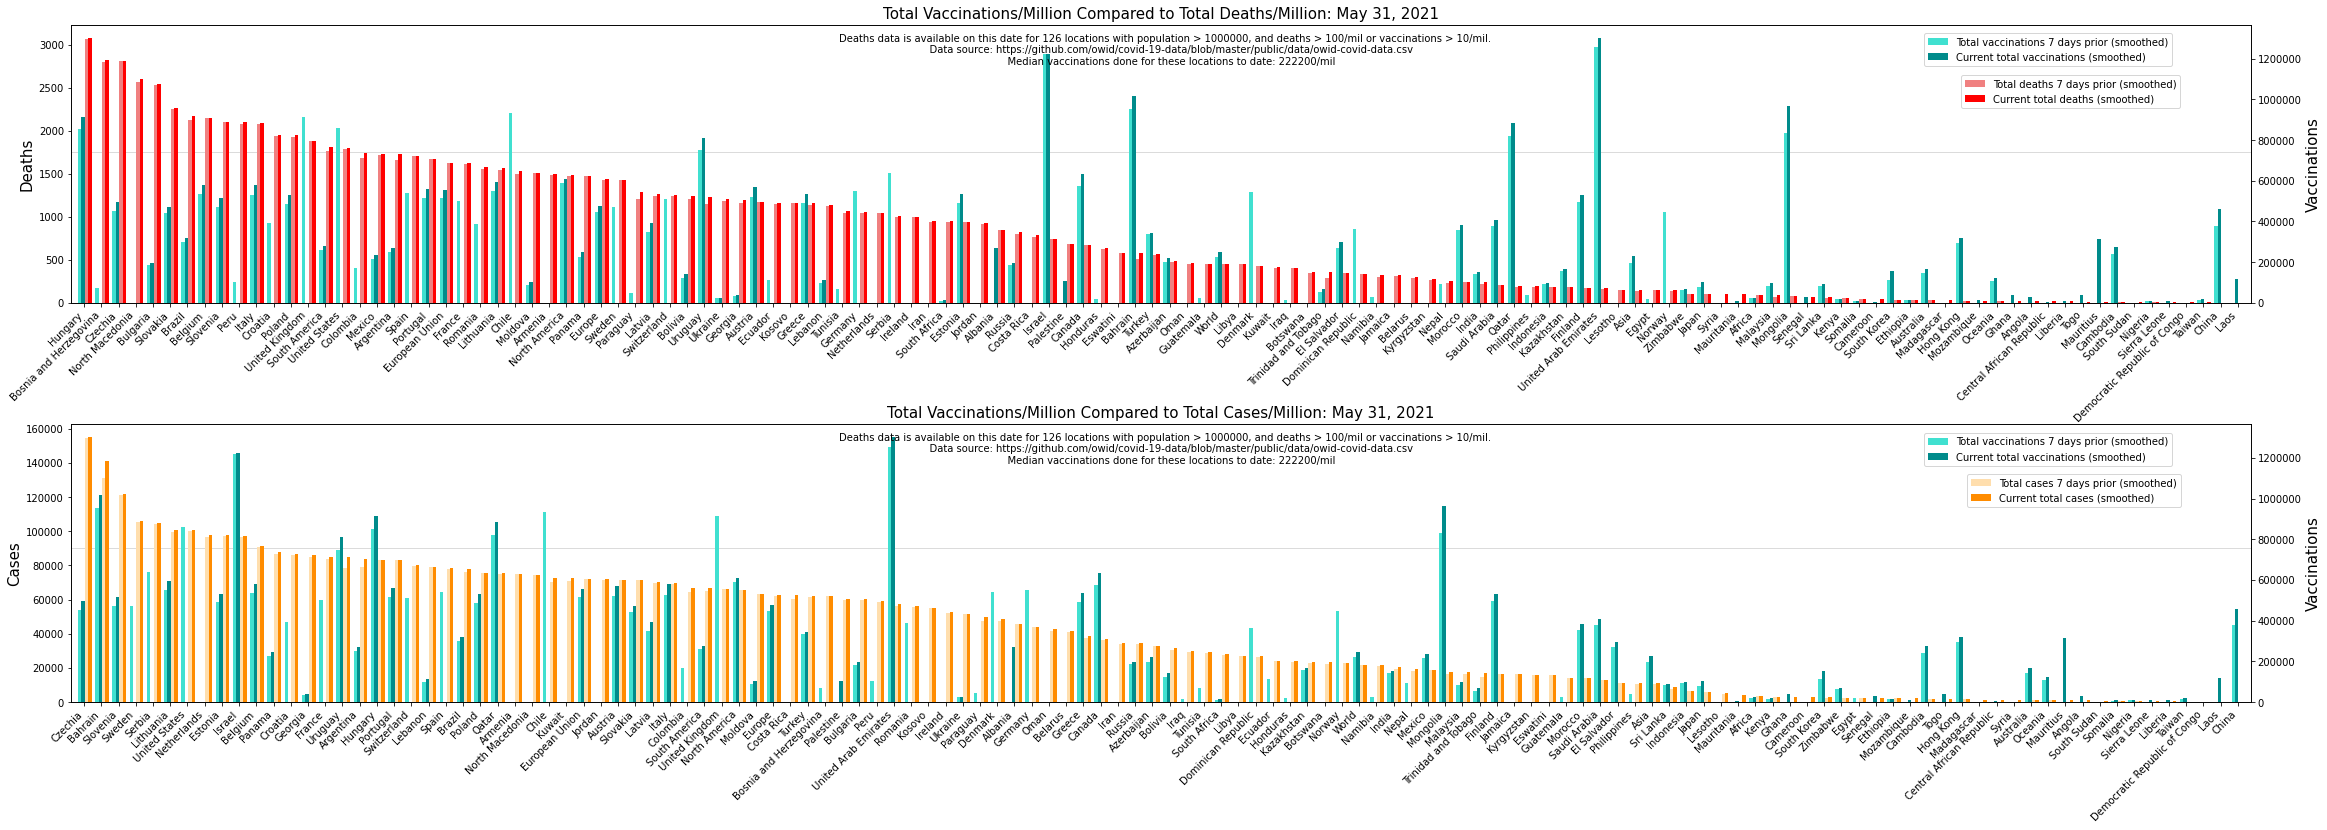

In [16]:
num_days_back = 7
legend_labels = []
x_vals = []
bar_width = 0.2
date_offset = 0
current_date = raw_df_dates[-1+date_offset]
past_date = raw_df_dates[-1*(num_days_back-date_offset)]
cumulative_deaths_threshold = 100 # include locations with more than this per million
cumulative_vax_threshold = 10

# Remove locations below daily deaths and vaccinations thresholds
perCapita_cumulative_filtered_df = perCapita_cumulative_df.query('total_deaths_per_million > %d or total_vaccinations_per_million > %d' %
                                                                 (cumulative_deaths_threshold, cumulative_vax_threshold))
# Temp datasets: extract current and past date rows for each location
temp_current_df = perCapita_cumulative_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == current_date])
temp_past_df = perCapita_cumulative_filtered_df.sort_values('date').groupby('location').apply(lambda x: x[x['date'] == past_date])

# median total vaccinations
median_total_vaxs = temp_current_df['total_vaccinations_per_million'].median().astype('int32')

# CREATE PLOTS
x_vals = np.arange(len(temp_current_df.index))
fig, axs = plt.subplots(2, 1, figsize=[int(len(x_vals)/4),10])
axs[0].ticklabel_format(scilimits=[0, 10])
axs[1].ticklabel_format(scilimits=[0, 10])
fig.tight_layout(h_pad=10)
inclusion_string = "Deaths data is available on this date for %d locations with population > %d, and deaths > %d/mil or vaccinations > %d/mil.\n\
    Data source: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv\n\
    Median vaccinations done for these locations to date: %d/mil" \
     % (len([i[0] for i in temp_current_df.index]), min_population, cumulative_deaths_threshold, cumulative_vax_threshold, median_total_vaxs)

# death/vaccinations (top)
# sort temp datasets by deaths
temp_current_df = temp_current_df.sort_values("total_deaths_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
# plot
ax_top1 = axs[0]
ax_top2 = ax_top1.twinx()
ax_top2.ticklabel_format(scilimits=[0, 10])
ax_top2.set_ylabel('Vaccinations', fontsize=15)
ax_top1.set_ylabel('Deaths', fontsize=15)
ax_top1.set_title("Total Vaccinations/Million Compared to Total Deaths/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_top1.set_xticks(x_vals + bar_width*1.3)
ax_top1.set_xlim([-0.5,len(x_vals)])
ax_top1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_top1.bar(x_vals + bar_width*2, temp_past_df["total_deaths_per_million"], alpha=bar_transparency, color='lightcoral', width=bar_width, zorder=1)
ax_top1.bar(x_vals + bar_width*3, temp_current_df["total_deaths_per_million"], alpha=bar_transparency, color='red', width=bar_width, zorder=1)
ax_top1.hlines(ax_top1.get_yticks()[-1]/2, ax_top1.get_xlim()[0], ax_top1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_top2.bar(x_vals, temp_past_df["total_vaccinations_per_million"], color='turquoise', width=bar_width, zorder=1)
ax_top2.bar(x_vals + bar_width, temp_current_df["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width, zorder=1)
ax_top2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])
ax_top1.legend(['Total deaths %d days prior (smoothed)'%num_days_back, 'Current total deaths (smoothed)'], loc=[0.867, 0.7])
ax_top2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

# cases/vaccinations (bottom)
# sort temp datasets by cases
temp_current_df = temp_current_df.sort_values("total_cases_per_million", ascending=False)
temp_past_df = temp_past_df.reindex(temp_current_df.index)
#plot
ax_bottom1 = axs[1]
ax_bottom2 = ax_bottom1.twinx()
ax_bottom2.ticklabel_format(scilimits=[0, 10])
ax_bottom2.set_ylabel('Vaccinations', fontsize=15)
ax_bottom1.set_ylabel('Cases', fontsize=15)
ax_bottom1.set_title("Total Vaccinations/Million Compared to Total Cases/Million: %s" % current_date.strftime('%b %d, %Y'), fontsize=15)
ax_bottom1.set_xticks(x_vals + bar_width*1.3)
ax_bottom1.set_xticklabels([i[0] for i in temp_current_df.index], rotation = 45, ha='right')
ax_bottom1.set_xlim([-0.5,len(x_vals)])
ax_bottom1.bar(x_vals + bar_width*2, temp_past_df["total_cases_per_million"], alpha=bar_transparency, color='navajowhite', width=bar_width)
ax_bottom1.bar(x_vals + bar_width*3, temp_current_df["total_cases_per_million"], alpha=bar_transparency, color='darkorange', width=bar_width)
ax_bottom1.hlines(ax_bottom1.get_yticks()[-1]/2, ax_bottom1.get_xlim()[0], ax_bottom1.get_xlim()[1], color='lightgray', zorder=0, linewidth=0.8, label='_nolegend_')
ax_bottom2.bar(x_vals, temp_past_df["total_vaccinations_per_million"], color='turquoise', width=bar_width)
ax_bottom2.bar(x_vals + bar_width, temp_current_df["total_vaccinations_per_million"], alpha=bar_transparency, color='darkcyan', width=bar_width)
ax_bottom2.legend(['Total vaccinations %d days prior (smoothed)'%num_days_back, 'Current total vaccinations (smoothed)'], loc=[0.85,0.85])
ax_bottom1.legend(['Total cases %d days prior (smoothed)'%num_days_back, 'Current total cases (smoothed)'], loc=[0.87, 0.7])
ax_bottom2.text(ax_top2.get_xlim()[1]/2, ax_top2.get_ylim()[1]*0.97, inclusion_string, ha='center', va='top', fontsize=10, zorder=2)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/cumulative_vaccine_vs_deaths_per_capita'
  plt.savefig(filename, bbox_inches = 'tight')